<a href="https://colab.research.google.com/github/Abinaya-M-R/Traffic-Sign/blob/main/traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload exactly 10 reference images for traffic signs (e.g., 00000.png to 00009.png).
Ensure each image is a distinct traffic sign in PNG format.


Saving sig1.jpg to sig1.jpg
Saving sig2.jpg to sig2.jpg
Saving sig3.jpg to sig3.jpg
Saving sig4.jpg to sig4.jpg
Saving sig5.jpg to sig5.jpg
Saving sig6.jpg to sig6.jpg
Saving sig7.jpg to sig7.jpg
Saving sig8.jpg to sig8.jpg
Saving sig9.jpg to sig9.jpg
Saving sig10.jpg to sig10.jpg

Reference Image Mappings:
sig1.jpg: Speed Limit
sig2.jpg: No Entry
sig3.jpg: No Parking
sig4.jpg: Yield
sig5.jpg: Turn Right
sig6.jpg: Pedestrian Crossing
sig7.jpg: Stop
sig8.jpg: Turn Left
sig9.jpg: Crossroad
sig10.jpg: Roundabout

Upload one test image to classify (e.g., test_sign.png)


Saving sig6.jpg to sig6 (1).jpg

Predicted Traffic Sign: Pedestrian Crossing
Confidence (Similarity Score): 1.0000


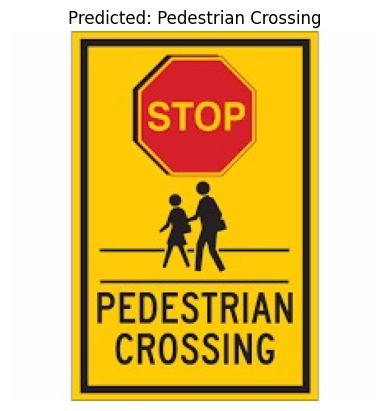

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Step 1: Install required libraries
!pip install opencv-python scikit-learn

# Step 2: Import libraries
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import datetime

# Step 3: Define image preprocessing function
def preprocess_image(image_path, size=(64, 64)):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not load image: {image_path}")
    img = cv2.resize(img, size)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_flat = img_gray.flatten()
    return img_flat

# Step 4: Upload 10 reference images
print("Please upload exactly 10 reference images for traffic signs (e.g., 00000.png to 00009.png).")
print("Ensure each image is a distinct traffic sign in PNG format.")
uploaded_ref = files.upload()
if len(uploaded_ref) != 10:
    raise ValueError(f"Uploaded {len(uploaded_ref)} images. Please upload exactly 10 reference images.")
ref_image_paths = list(uploaded_ref.keys())
ref_images = [preprocess_image(path) for path in ref_image_paths]

# Step 5: Define labels for traffic signs
# Assign specific traffic sign types to the 10 images
labels = [
    "Speed Limit",
    "No Entry",
    "No Parking",
    "Yield",
    "Turn Right",
    "Pedestrian Crossing",
    "Stop",
    "Turn Left",
    "Crossroad",
    "Roundabout"
]
# Map reference images to labels
ref_image_labels = {ref_image_paths[i]: labels[i] for i in range(10)}

# Step 6: Print reference image mappings
print("\nReference Image Mappings:")
for path, label in ref_image_labels.items():
    print(f"{path}: {label}")

# Step 7: Upload test image
print("\nUpload one test image to classify (e.g., test_sign.png)")
uploaded_test = files.upload()
if len(uploaded_test) != 1:
    raise ValueError("Please upload exactly one test image.")
test_image_path = list(uploaded_test.keys())[0]
test_image = preprocess_image(test_image_path)

# Step 8: Compare test image to reference images using cosine similarity
ref_images_array = np.array(ref_images)
similarity_scores = cosine_similarity([test_image], ref_images_array)[0]
max_similarity_idx = np.argmax(similarity_scores)
predicted_label = labels[max_similarity_idx]
confidence = similarity_scores[max_similarity_idx]

# Step 9: Print prediction
print(f"\nPredicted Traffic Sign: {predicted_label}")
print(f"Confidence (Similarity Score): {confidence:.4f}")

# Step 10: Display test image with predicted label
test_img = cv2.imread(test_image_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Step 11: Save results to a text file
output_file = f"traffic_sign_prediction_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"
with open(output_file, 'w') as f:
    f.write("Traffic Sign Recognition Results\n")
    f.write(f"Date and Time: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    f.write("Reference Image Mappings:\n")
    for path, label in ref_image_labels.items():
        f.write(f"{path}: {label}\n")
    f.write("\nTest Image Prediction:\n")
    f.write(f"Test Image: {test_image_path}\n")
    f.write(f"Predicted Traffic Sign: {predicted_label}\n")
    f.write(f"Confidence (Similarity Score): {confidence:.4f}\n")

# Step 12: Download the text file
files.download(output_file)

Upload 10 reference images (JPG format), one per label.


Saving sig1.jpg to sig1 (1).jpg
Saving sig2.jpg to sig2 (1).jpg
Saving sig3.jpg to sig3 (1).jpg
Saving sig4.jpg to sig4 (1).jpg
Saving sig5.jpg to sig5 (1).jpg
Saving sig6.jpg to sig6 (2).jpg
Saving sig7.jpg to sig7 (1).jpg
Saving sig8.jpg to sig8 (1).jpg
Saving sig9.jpg to sig9 (1).jpg
Saving sig10.jpg to sig10 (1).jpg
Loaded reference images with labels.

Now upload a test image to classify.


Saving WIN_20250521_18_15_11_Pro.jpg to WIN_20250521_18_15_11_Pro.jpg


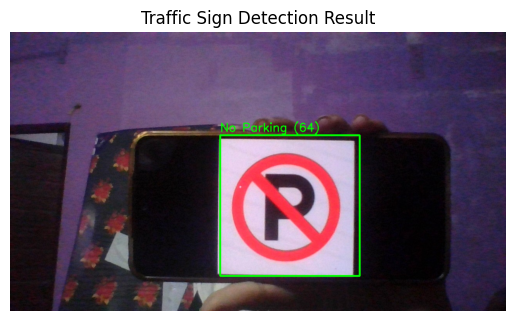

In [9]:
# Step 1: Install required libraries
!pip install opencv-python-headless --quiet

# Step 2: Import required libraries
import cv2
import os
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Step 3: Define your labels
labels = [
    "Speed Limit",
    "No Entry",
    "No Parking",
    "Yield",
    "Turn Right",
    "Pedestrian Crossing",
    "Stop",
    "Turn Left",
    "Crossroad",
    "Roundabout"
]

# Step 4: Upload exactly 10 reference images
print("Upload 10 reference images (JPG format), one per label.")
uploaded_refs = files.upload()

if len(uploaded_refs) != 10:
    raise ValueError(f"Uploaded {len(uploaded_refs)} files. Please upload exactly 10 images.")

# Step 5: Load reference images with ORB features
def load_reference_images(uploaded_refs, labels):
    orb = cv2.ORB_create()
    refs = {}

    for i, (filename, _) in enumerate(uploaded_refs.items()):
        img = cv2.imread(filename, 0)  # Grayscale
        if img is None:
            raise ValueError(f"Failed to read {filename}")
        kp, des = orb.detectAndCompute(img, None)
        refs[labels[i]] = (img, kp, des)
    return refs

refs = load_reference_images(uploaded_refs, labels)
print("Loaded reference images with labels.")

# Step 6: Upload a test image
print("\nNow upload a test image to classify.")
uploaded_test = files.upload()

if len(uploaded_test) != 1:
    raise ValueError("Please upload exactly one test image.")

test_filename = list(uploaded_test.keys())[0]
frame = cv2.imread(test_filename)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Step 7: ORB-based detection
def detect_sign(frame, gray, refs):
    orb = cv2.ORB_create()
    kp2, des2 = orb.detectAndCompute(gray, None)
    if des2 is None:
        print("No features found in test image.")
        return frame

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    best = (None, 0, None)

    for label, (img, kp1, des1) in refs.items():
        if des1 is None: continue
        matches = bf.match(des1, des2)
        if len(matches) < 10: continue

        src = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
        dst = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)
        H, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

        if H is not None and len(matches) > best[1]:
            box = cv2.perspectiveTransform(
                np.float32([[0,0],[0,img.shape[0]],[img.shape[1],img.shape[0]],[img.shape[1],0]]).reshape(-1,1,2), H)
            best = (label, len(matches), box)

    if best[2] is not None:
        x, y, w, h = cv2.boundingRect(np.int32(best[2]))
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 3)
        cv2.putText(frame, f"{best[0]} ({best[1]})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    else:
        print("No matching sign detected.")

    return frame

# Step 8: Detect and display
output = detect_sign(frame.copy(), gray, refs)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Traffic Sign Detection Result")
plt.axis('off')
plt.show()
